In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd

## Loading audio files

In [28]:
BASE_DIR='/Users/larsrass/Desktop/Research/Music Files/'
ambient_file = "Mono1.mp3"
ipd.Audio(os.path.join(BASE_DIR,ambient_file))
# load audio files with librosa
ambient, sr = librosa.load(os.path.join(BASE_DIR,ambient_file))

##Set Variables
FRAME_SIZE = 1024
HOP_LENGTH = 512

## Spectral centroid

The frequency at which a spectrum's energy is centered around is known as the spectral centroid.

In [27]:
sc_ambient = librosa.feature.spectral_centroid(y=ambient, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_ambient.shape

(58060,)

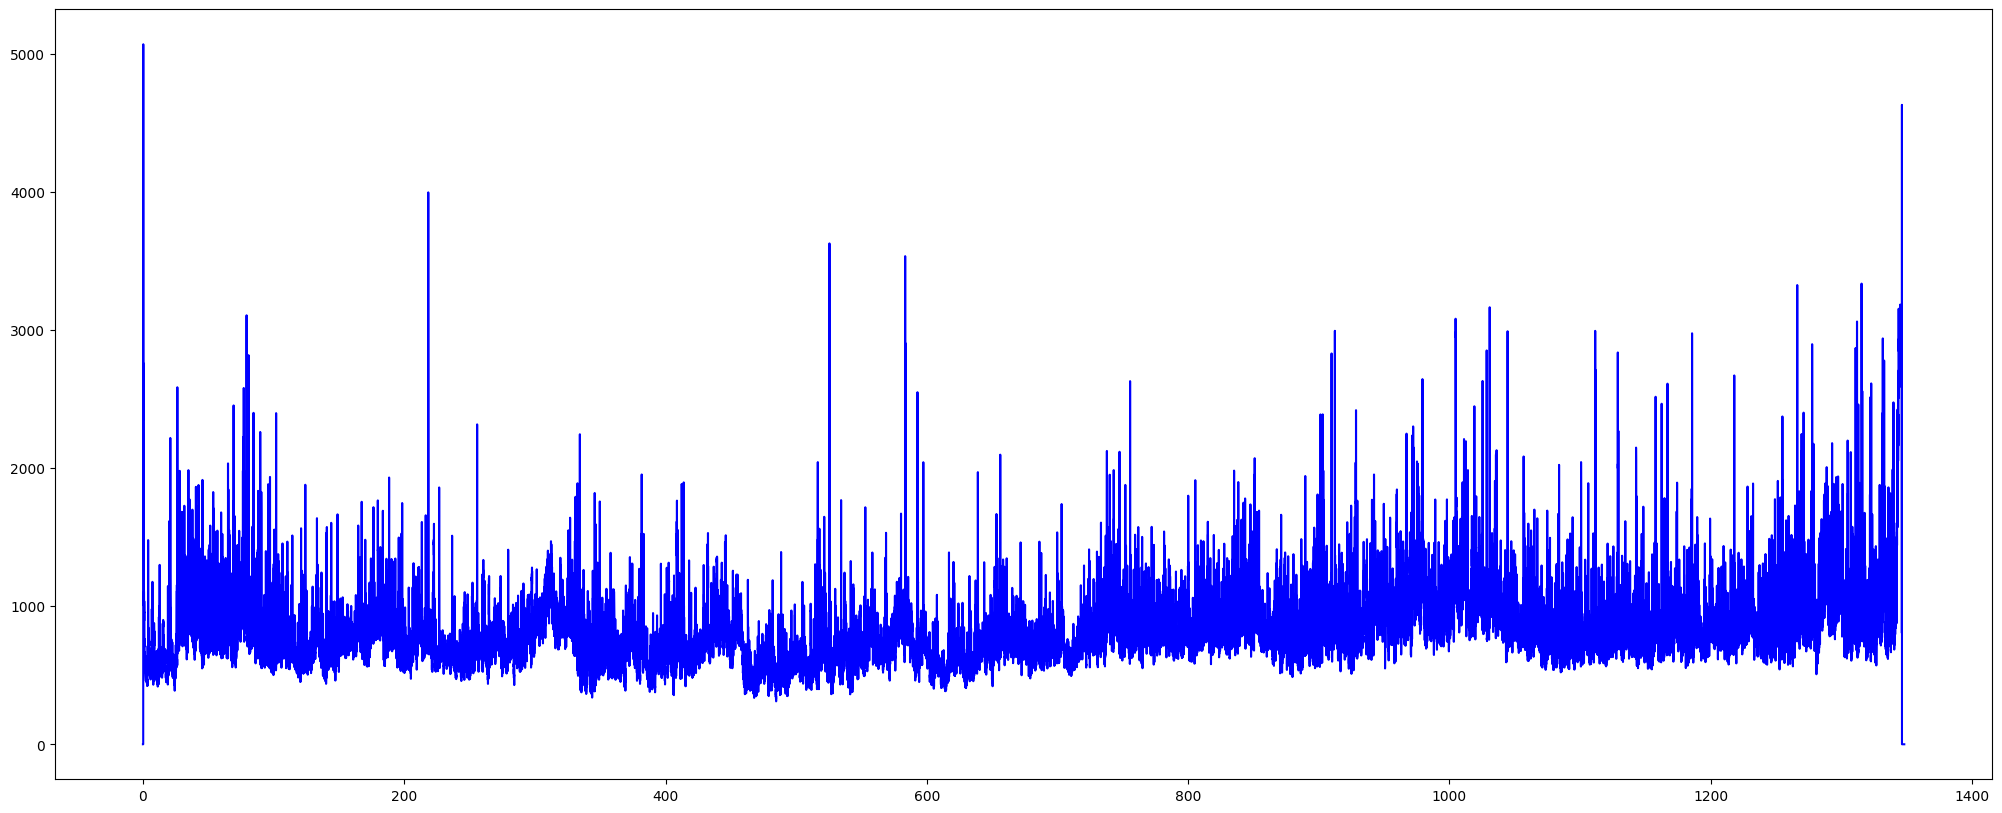

In [25]:
frames = range(len(sc_ambient))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.figure(figsize=(25,10))
plt.plot(t, sc_ambient, color='b')
plt.show()

## Spectral bandwidth

Computes the p’th-order spectral bandwidth.

In [9]:
ban_ambient = librosa.feature.spectral_bandwidth(y=ambient, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_ambient.shape

(58060,)

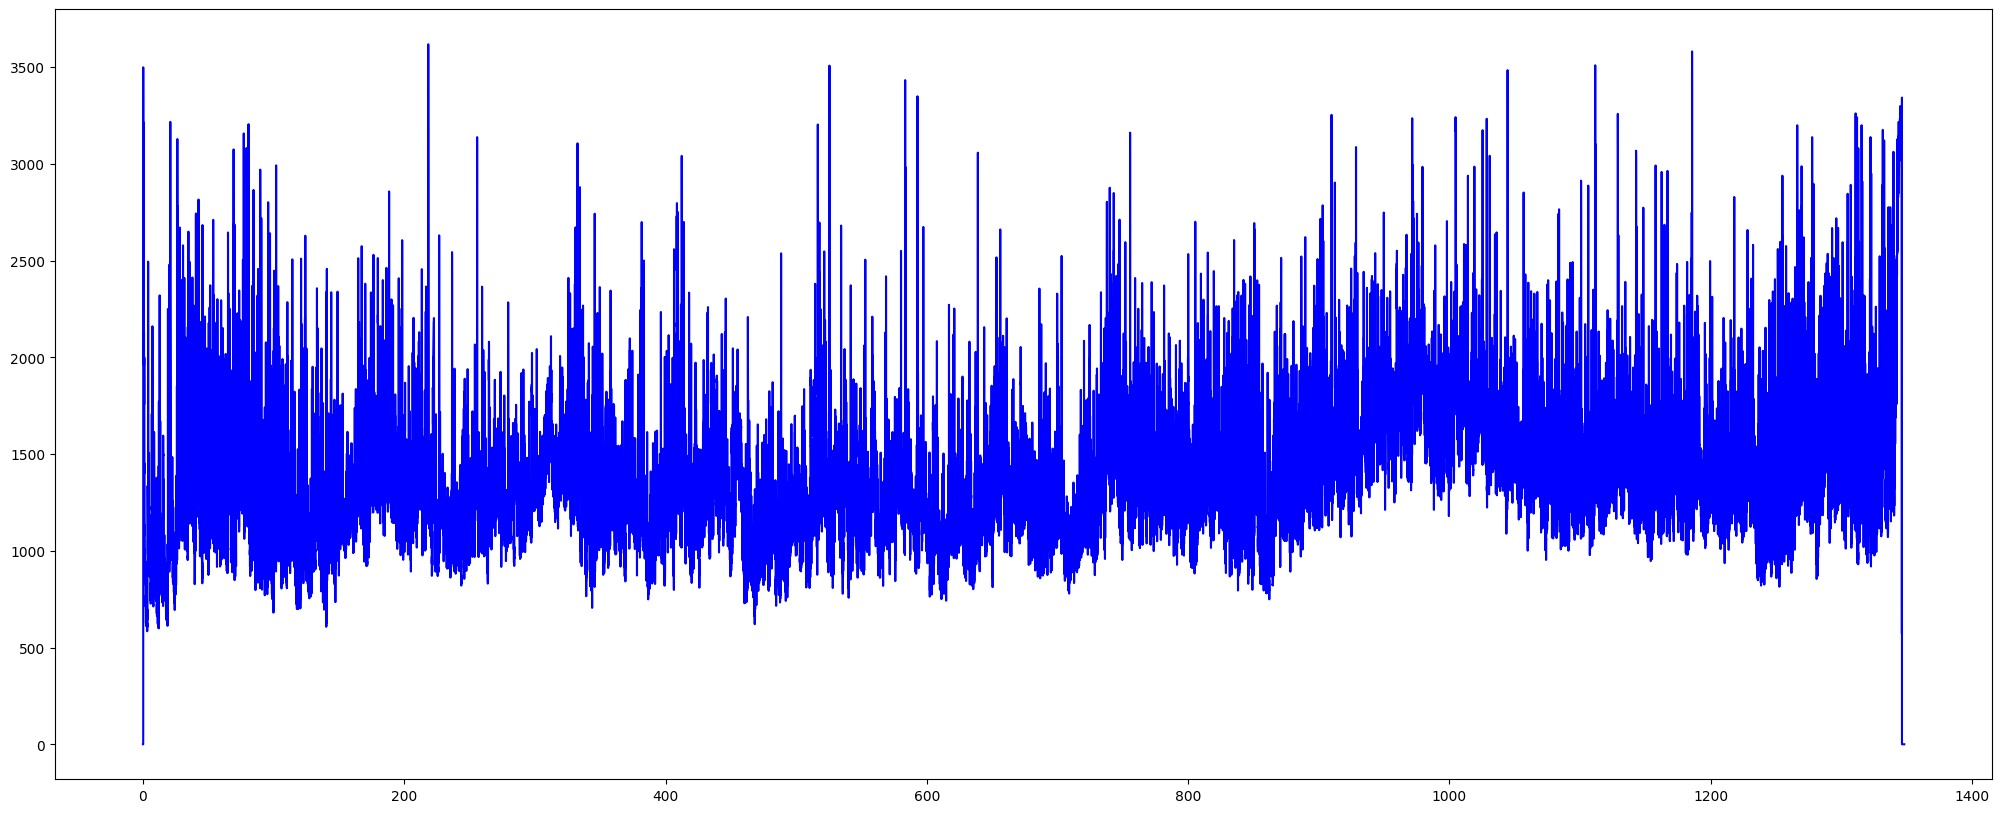

In [10]:
frames = range(len(ban_ambient))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
len(t)

plt.figure(figsize=(25,10))
plt.plot(t, ban_ambient, color='b')
plt.show()

## Root-Mean-Squared

Compute root-mean-square (RMS) value for each frame

In [11]:
rms_ambient = librosa.feature.rms(y=ambient, frame_length=FRAME_SIZE ,hop_length=HOP_LENGTH)
#S, phase = librosa.magphase(librosa.stft(ambient))
#rms_ambient = librosa.feature.rms(S=S)
rms_ambient.shape

(1, 58060)

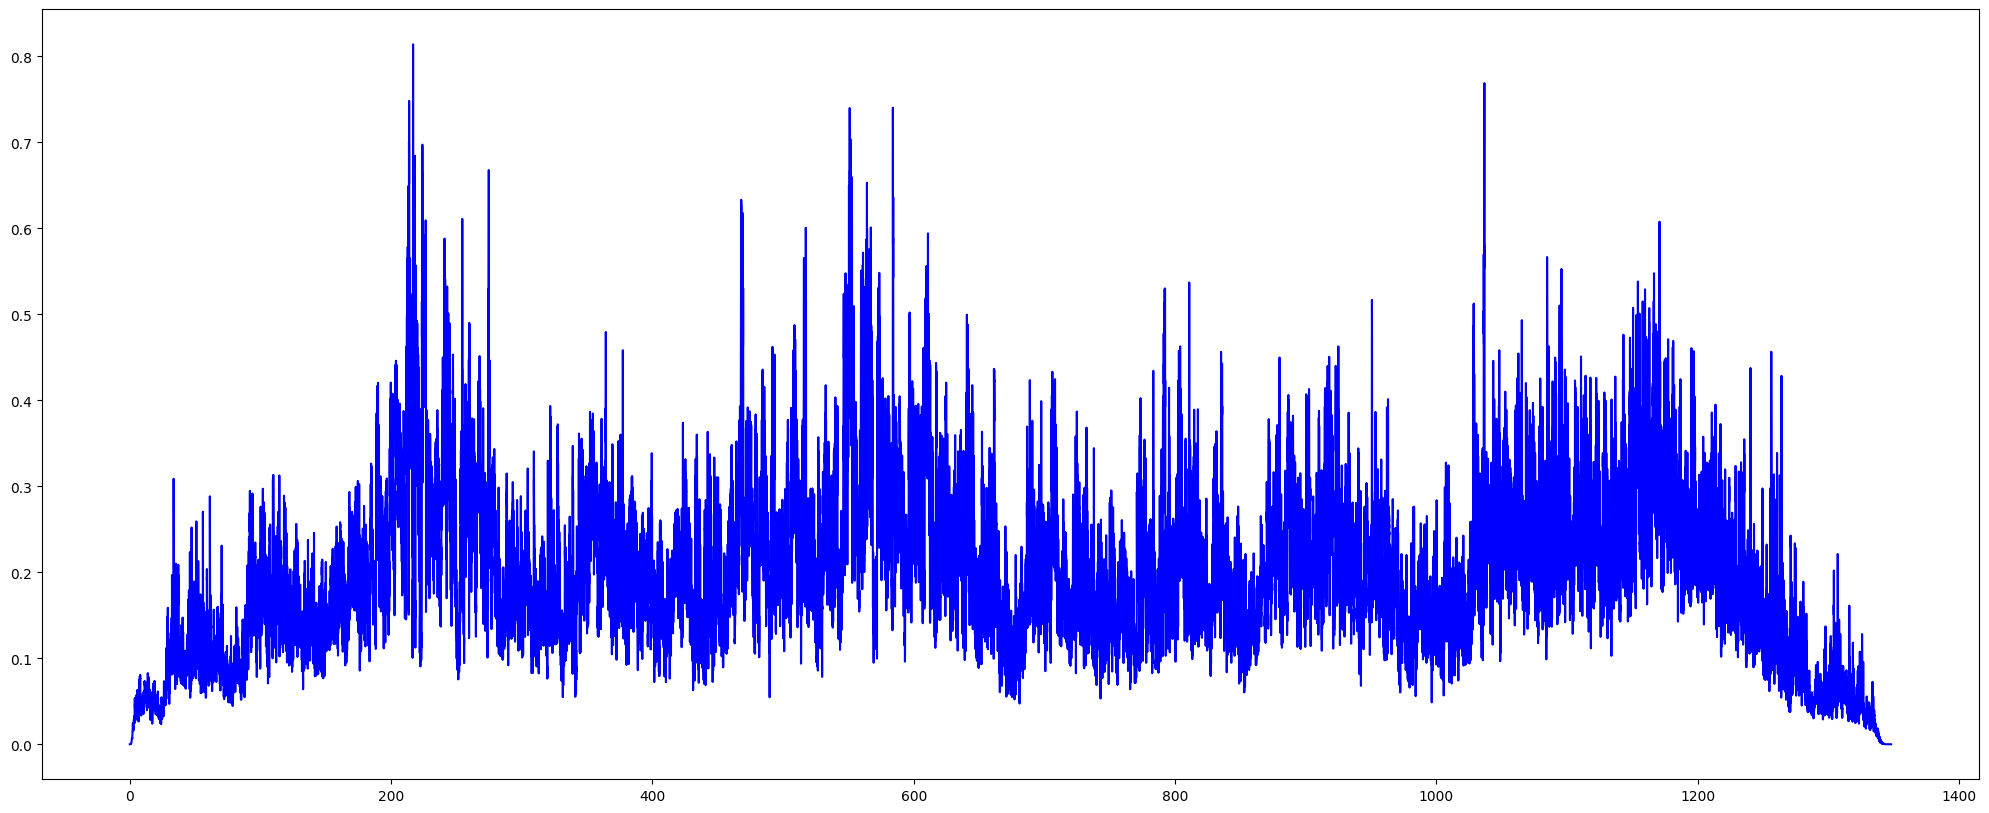

In [12]:


#Librosa Visualization
"""
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms_ambient)
#Create First Log-Scaling Graph
ax[0].semilogy(times, rms_ambient[0], label='RMS Energy')
#Show legent
ax[0].legend()
#Only Show Label at the bottom Time Axis 
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()
"""

#Simple Visualization
times = librosa.times_like(rms_ambient)
plt.figure(figsize=(25,10))
plt.plot(t, rms_ambient[0], color='b')
plt.show()

## Spectral Contrast

In each frequency subband, the spectral peak, spectral valley, and their differences are taken into account when calculating spectral contrast.

In [13]:
S = np.abs(librosa.stft(ambient))
contrast_ambient = librosa.feature.spectral_contrast(S=S, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
contrast_ambient.shape

(7, 58060)

For every time frame, the function calculates the spectral contrast for seven subbands:

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

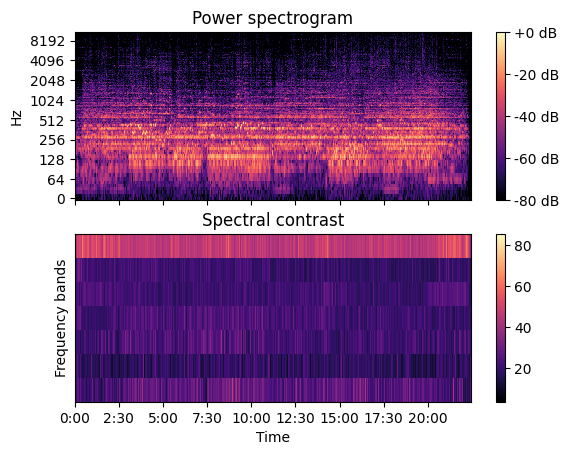

In [14]:
#Show Spectrogram
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast_ambient, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

## Spectral Flatness

Spectral flatness (or tonality coefficient) measures how "noise" or "tone" like a sound is. Closer to 1 indicates more white-noise similarity 

In [15]:
flatness_ambient = librosa.feature.spectral_flatness(y=ambient, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
flatness_ambient.shape

(1, 58060)

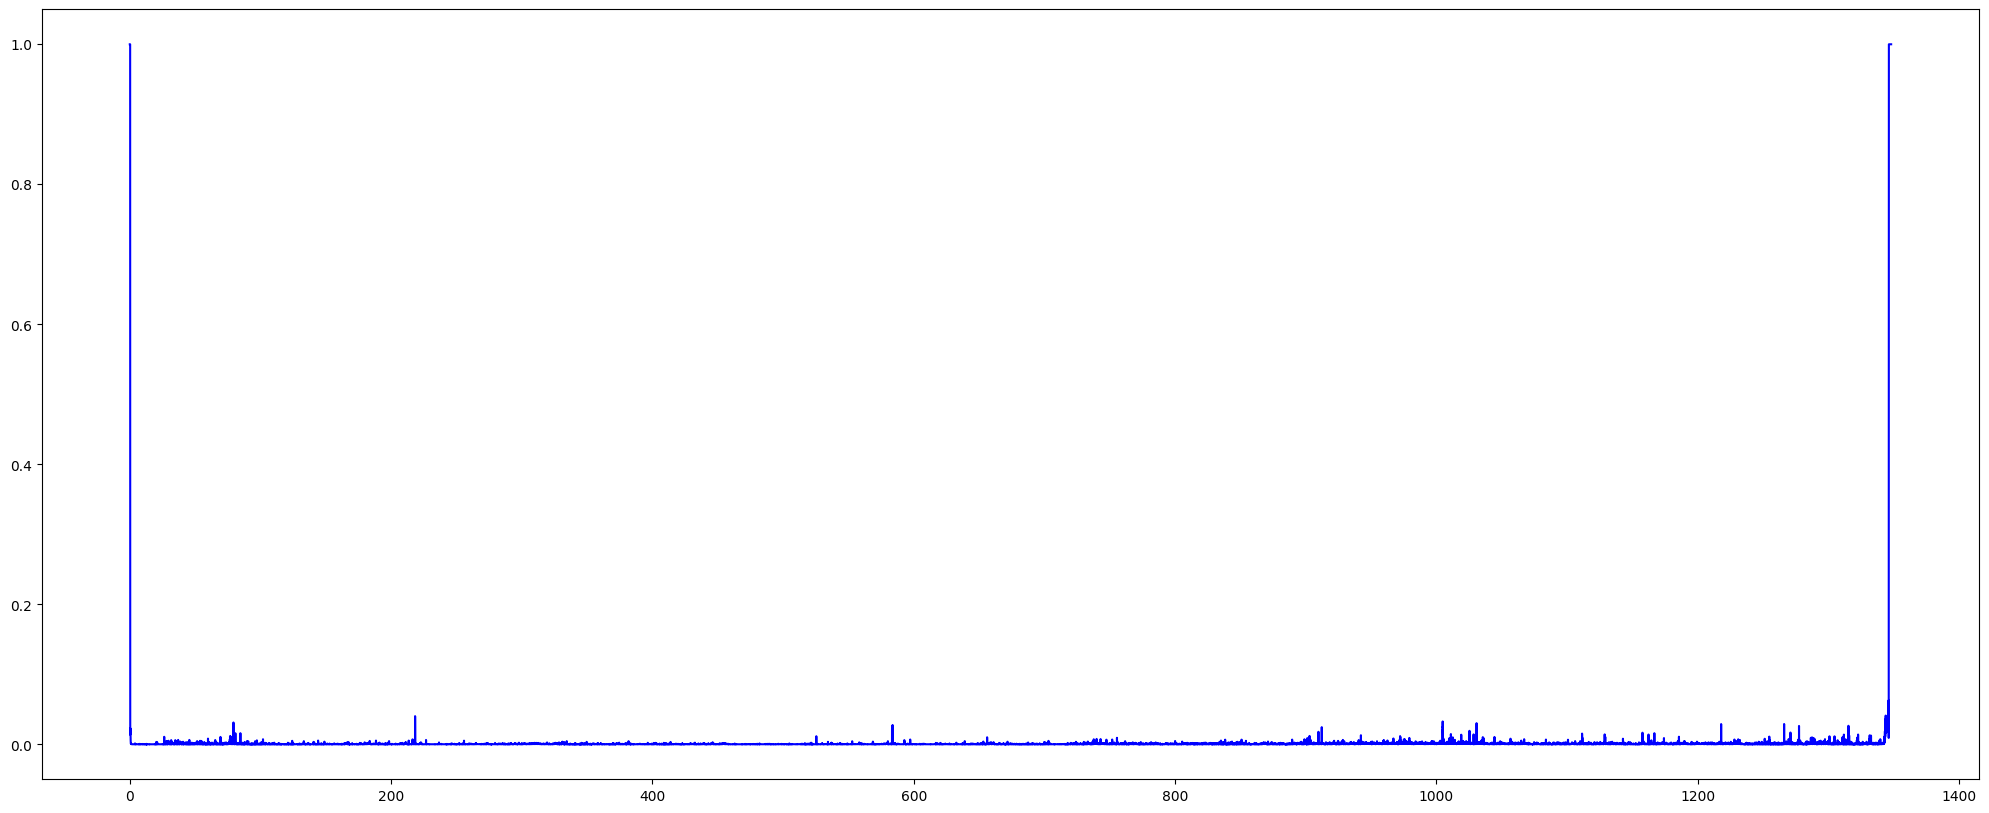

In [16]:
times = librosa.times_like(flatness_ambient)
plt.figure(figsize=(25,10))
plt.plot(t, flatness_ambient[0], color='b')
plt.show()

## Spectral Rolloff

Every frame's roll-off frequency is specified as the center frequency of a spectrogram bin such that this bin and the bins below contain at least roll_percent (0.85 by default) of the spectrum's energy.

In [17]:
rolloff_ambient_85 = librosa.feature.spectral_rolloff(y=ambient, roll_percent = 0.85, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
#rolloff_ambient_99 = librosa.feature.spectral_rolloff(y=ambient, roll_percent = 0.85, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
#rolloff_ambient_01 = librosa.feature.spectral_rolloff(y=ambient, roll_percent = 0.01, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
rolloff_ambient_85.shape

(1, 58060)

Therefore one might want to calculate rolloff frequencies for different energy percentages

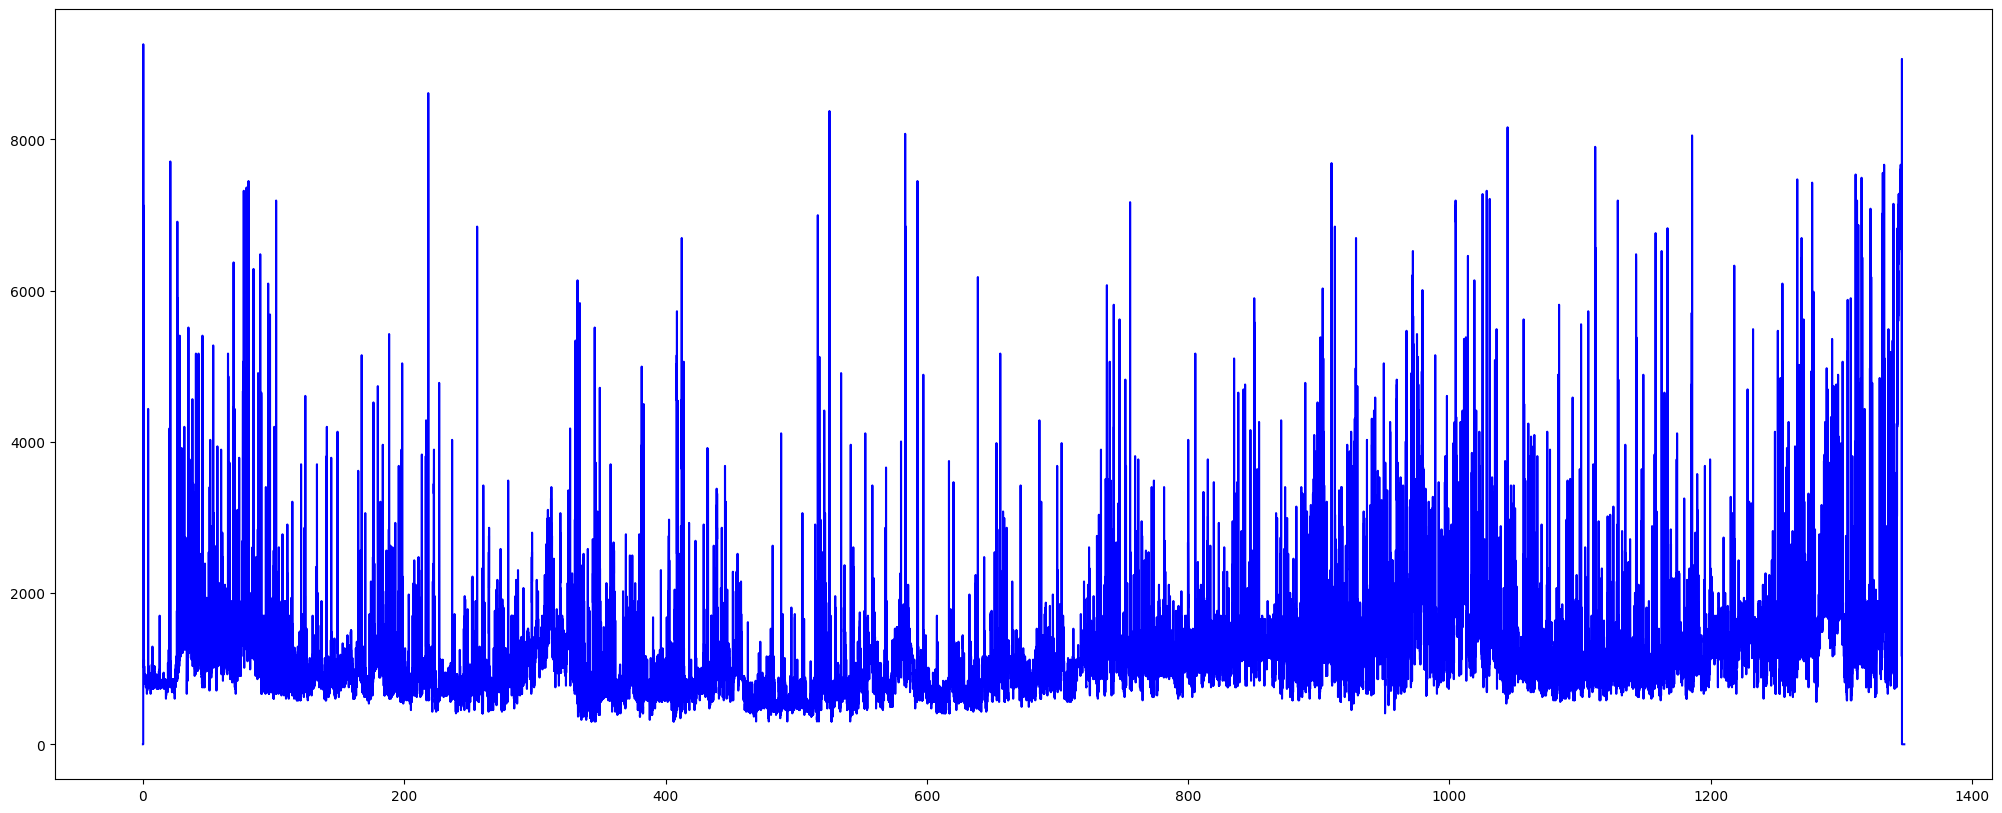

In [23]:
#Simple Visualization
times = librosa.times_like(rolloff_ambient_85)
plt.figure(figsize=(25,10))
plt.plot(t, rolloff_ambient_85[0], color='b')
#plt.plot(t, rolloff_ambient_99[0], color='r')
#plt.plot(t, rolloff_ambient_01[0], color='y')
plt.show()